In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ~/demres

/Users/zurfarosa/demres


In [3]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np
from datetime import date, timedelta
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

import demres
from demres.common.constants import entry_type
from demres.common import codelists
from demres.common.process_pt_features import *
from demres.common.process_entries import *
from demres.demins.constants import Study_Design
from demres.demins.functions import *
from common.helper_functions import *

In [4]:
%matplotlib inline

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
pt_features = pd.read_csv('data/pt_data/processed_data/pt_features_demins_all_dementia.csv',delimiter=',')

In [7]:
training_cols = [col for col in pt_features.columns if all([col not in ['patid','insomnia_window0_count','index_date','matchid','data_start','data_end','final dementia medcode','isCase','yob','pracid'],'window1' not in col])]
# training_cols_window0.insert(0, training_cols_window0.pop(training_cols_window0.index('insomnia_window0_count')))

In [8]:
training_cols

['gender',
 'age_at_index_date',
 'insomnia_window0',
 'stroke_window0',
 'intellectual_disability',
 'CHD_heart_failure_and_peripheral_vascular_disease_window0',
 'hypertension_window0',
 'diabetes_window0',
 'clin_sig_alcohol_use_window0',
 'mental_illness_non_smi_window0',
 'mental_illness_smi',
 'sleep_apnoea_window0',
 'current_smoker_window0',
 'asthma_window0',
 'COPD',
 'CKD_window0',
 'mood_stabilisers_pdds_window0',
 'fgas_pdds_window0',
 'sgas_pdds_window0',
 'sga_depots_pdds_window0',
 'fga_depots_pdds_window0',
 'antidepressants_pdds_window0',
 'consultation_count_window0',
 'benzo_and_z_drugs_pdds_window0',
 'other_sedatives_pdds_window0']

In [9]:
pt_features[training_cols]

,gender,age_at_index_date,insomnia_window0,stroke_window0,intellectual_disability,CHD_heart_failure_and_peripheral_vascular_disease_window0,hypertension_window0,diabetes_window0,clin_sig_alcohol_use_window0,mental_illness_non_smi_window0,mental_illness_smi,sleep_apnoea_window0,current_smoker_window0,asthma_window0,COPD,CKD_window0,mood_stabilisers_pdds_window0,fgas_pdds_window0,sgas_pdds_window0,sga_depots_pdds_window0,fga_depots_pdds_window0,antidepressants_pdds_window0,consultation_count_window0,benzo_and_z_drugs_pdds_window0,other_sedatives_pdds_window0
0,0,91.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,187,0,0
1,1,85.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,30,0,0,0,204,170,99,0
2,1,83.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,215,0,0
3,1,88.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,1244,0
4,0,71.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0
5,1,91.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,0,0
6,0,74.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,240,0,0
7,1,83.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,215,0,0
8,0,85.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0
9,0,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107,0,0


In [10]:
thresh=5.0
X = pt_features[training_cols]

In [11]:
X['gender'].index

RangeIndex(start=0, stop=18876, step=1)

In [12]:
X.shape

(18876, 25)

In [13]:
variables = range(X.shape[1])
# dropped=True
# while dropped:
#     dropped=False
# VIF(np.array(X),0)
         
# vifs = [VIF(X[variables], ix) for ix in range(X[variables].shape[1])]
#     maxloc = vif_vals.index(max(vif_vals))
#     if max(vif_vals) > thresh:
#         print('dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
#         del variables[maxloc]
#         dropped=True

# print('Remaining variables:')
# print(X.columns[variables])
# return X[variables

In [14]:
X.shape

(18876, 25)

In [15]:
list(zip(X.columns,[VIF(X.values,ix) for ix in range(X.shape[1])]))

[('gender', 2.8731820679061322),
 ('age_at_index_date', 5.1516834487034089),
 ('insomnia_window0', 1.1909272968382121),
 ('stroke_window0', 1.0796179587183516),
 ('intellectual_disability', 1.0034214328931896),
 ('CHD_heart_failure_and_peripheral_vascular_disease_window0',
  1.2910675197470447),
 ('hypertension_window0', 1.3667762100454928),
 ('diabetes_window0', 1.1457435755336027),
 ('clin_sig_alcohol_use_window0', 1.0127758044552657),
 ('mental_illness_non_smi_window0', 1.3820252902661689),
 ('mental_illness_smi', 1.2091514204377716),
 ('sleep_apnoea_window0', 1.0056055403566881),
 ('current_smoker_window0', 1.1643864736761018),
 ('asthma_window0', 1.2654359578434822),
 ('COPD', 1.577934081606386),
 ('CKD_window0', 1.0081708143100587),
 ('mood_stabilisers_pdds_window0', 1.0224370060253722),
 ('fgas_pdds_window0', 1.0762497647301237),
 ('sgas_pdds_window0', 1.0160827170018794),
 ('sga_depots_pdds_window0', 1.0019581423791148),
 ('fga_depots_pdds_window0', 1.0289632411521428),
 ('anti

In [16]:
def plot_corr(df,size=15):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns,rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);

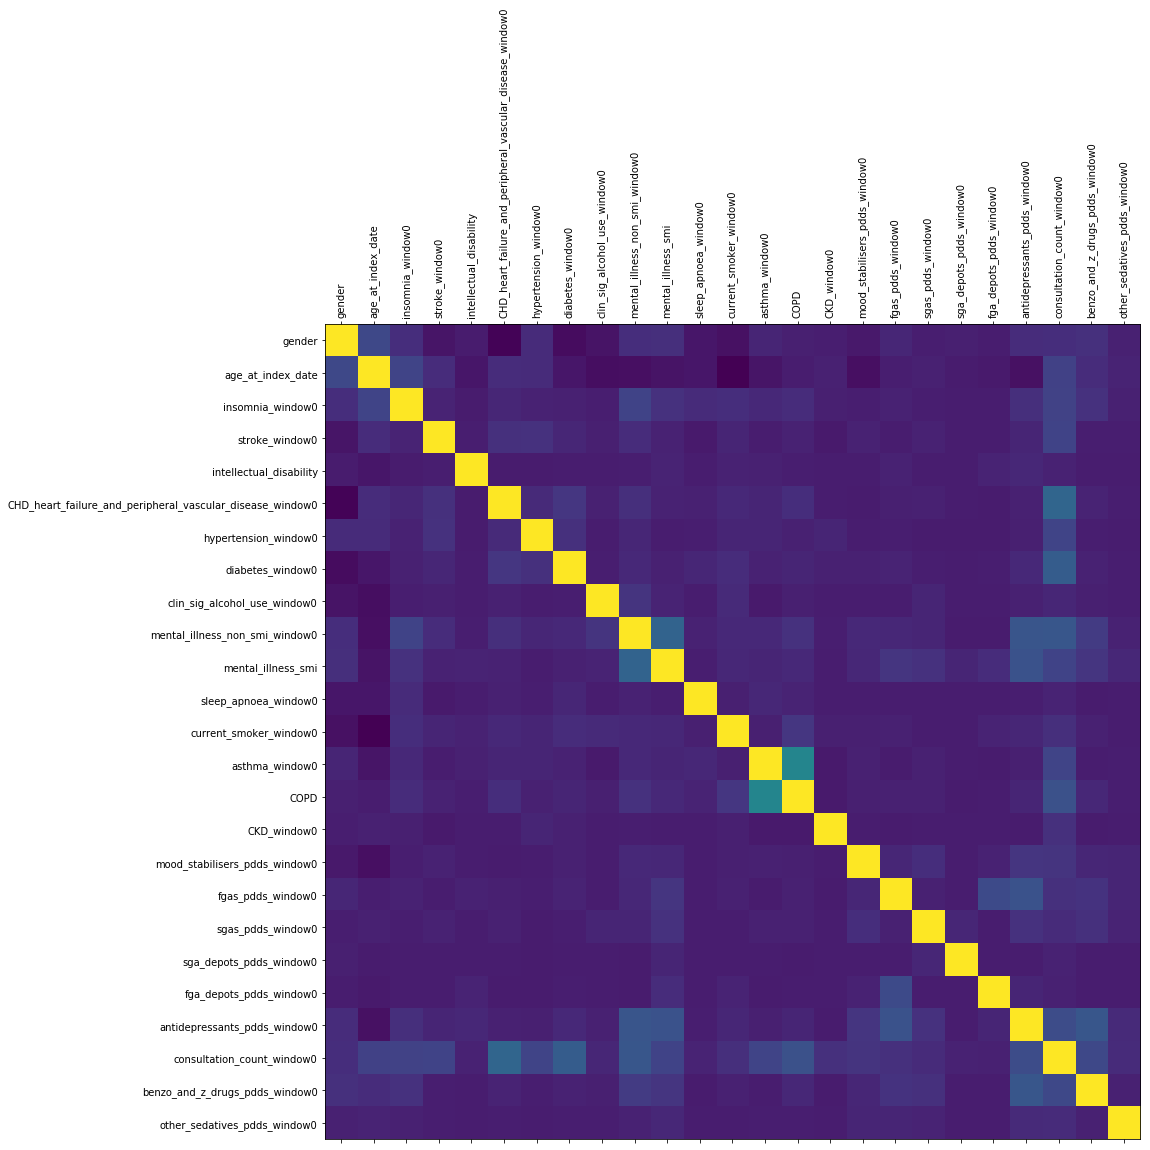

In [17]:
plot_corr(X)

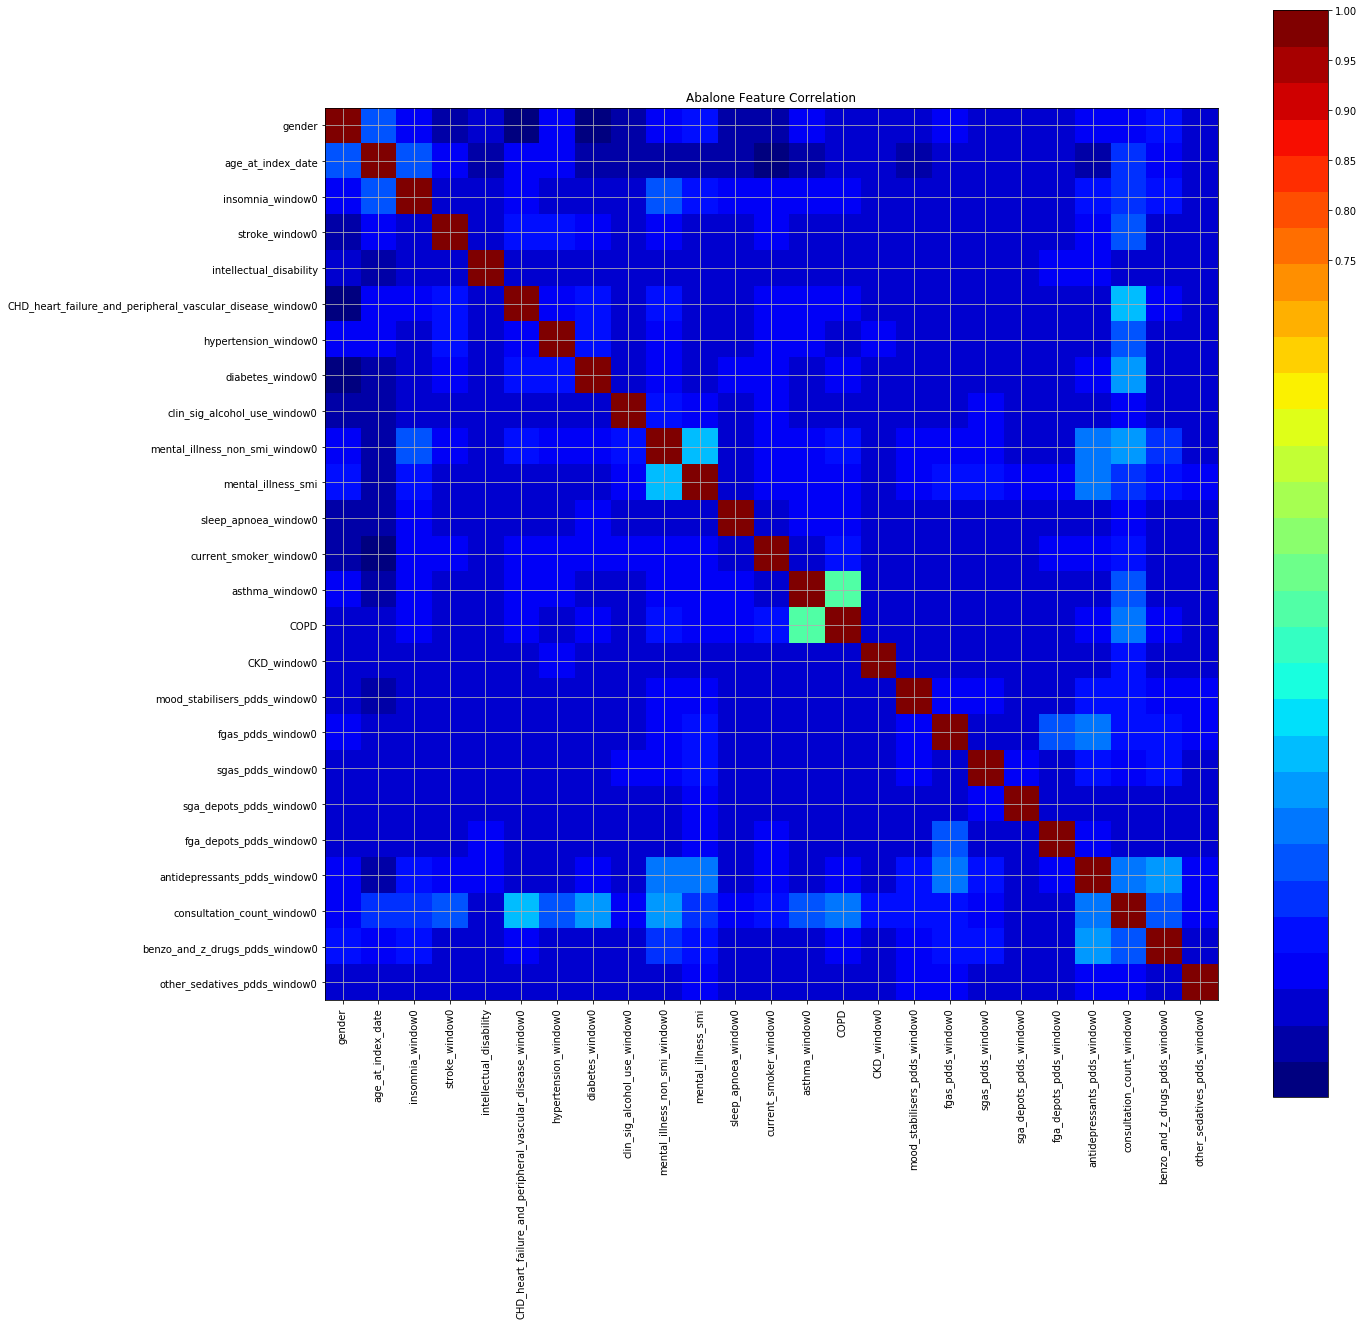

In [18]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

#     fig = plt.figure()
#     ax1 = fig.add_subplot(111)
    fig, ax1 = plt.subplots(figsize=(20, 20))
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=df.columns
    plt.xticks(range(len(labels)),labels,rotation='vertical')
    plt.yticks(range(len(labels)),labels)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.figure(figsize=(50,50))
    plt.show()

correlation_matrix(X)